In [22]:
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import torch
from sklearn.decomposition import PCA
import umap

In [19]:
def load_data_and_compute_tsne(path_emb, path_gt):
    with open(path_emb, 'rb') as f:
        emb = pickle.load(f)

    with open(path_gt, 'rb') as f:
        gt = pickle.load(f)

    all_gt = [labels[1] for labels in gt]
    all_gt = torch.cat(all_gt)
    all_emb = torch.cat(emb)

    all_emb = all_emb.cpu().numpy()
    all_gt = all_gt.cpu().numpy()

    # Compute t-SNE on the subset
    tsne = TSNE(n_components=2, random_state=3, perplexity=300)
    sub_emb_tsne = tsne.fit_transform(all_emb)

    return sub_emb_tsne, all_gt

def plot_tsne(sub_emb_tsne, all_gt, ax, title):
    # Plot on the given axis
    scatter = ax.scatter(sub_emb_tsne[:, 0], sub_emb_tsne[:, 1], c=all_gt, cmap='viridis', alpha=0.6)
    ax.set_title(title, fontsize=25)

# Paths to different embeddings and set names
paths = [
    ('../../taobao/logs/contrastive_emb/seed_0/embeddings.pickle', '../../taobao/logs/contrastive_emb/seed_0/gts.pickle'),
    ('../../taobao/logs/gen_emb/seed_1/embeddings.pickle', '../../taobao/logs/gen_emb/seed_1/gts.pickle'),
    ('../../taobao/logs/gc_emb/seed_1/embeddings.pickle', '../../taobao/logs/gc_emb/seed_1/gts.pickle'),
    ('../../taobao/logs/sigmoid_emb/seed_1/embeddings.pickle', '../../taobao/logs/sigmoid_emb/seed_1/gts.pickle')
]

# paths = [
    
#     ('../../age/logs/contrastive_emb/seed_0/embeddings.pickle', '../../age/logs/contrastive_emb/seed_0/gts.pickle'),
#     ('../../age/logs/gen_emb/seed_1/embeddings.pickle', '../../age/logs/gen_emb/seed_1/gts.pickle'),
#     ('../../age/logs/gc_emb/seed_1/embeddings.pickle', '../../age/logs/gc_emb/seed_1/gts.pickle'),
#     ('../../age/logs/sigmoid_emb/seed_1/embeddings.pickle', '../../age/logs/sigmoid_emb/seed_1/gts.pickle')
# ]
set_names = ['Contrastive', 'Generative', 'Naive', 'MLEM']

# Calculate t-SNE for each set of embeddings
tsne_results = [load_data_and_compute_tsne(path_emb, path_gt) for path_emb, path_gt in paths]


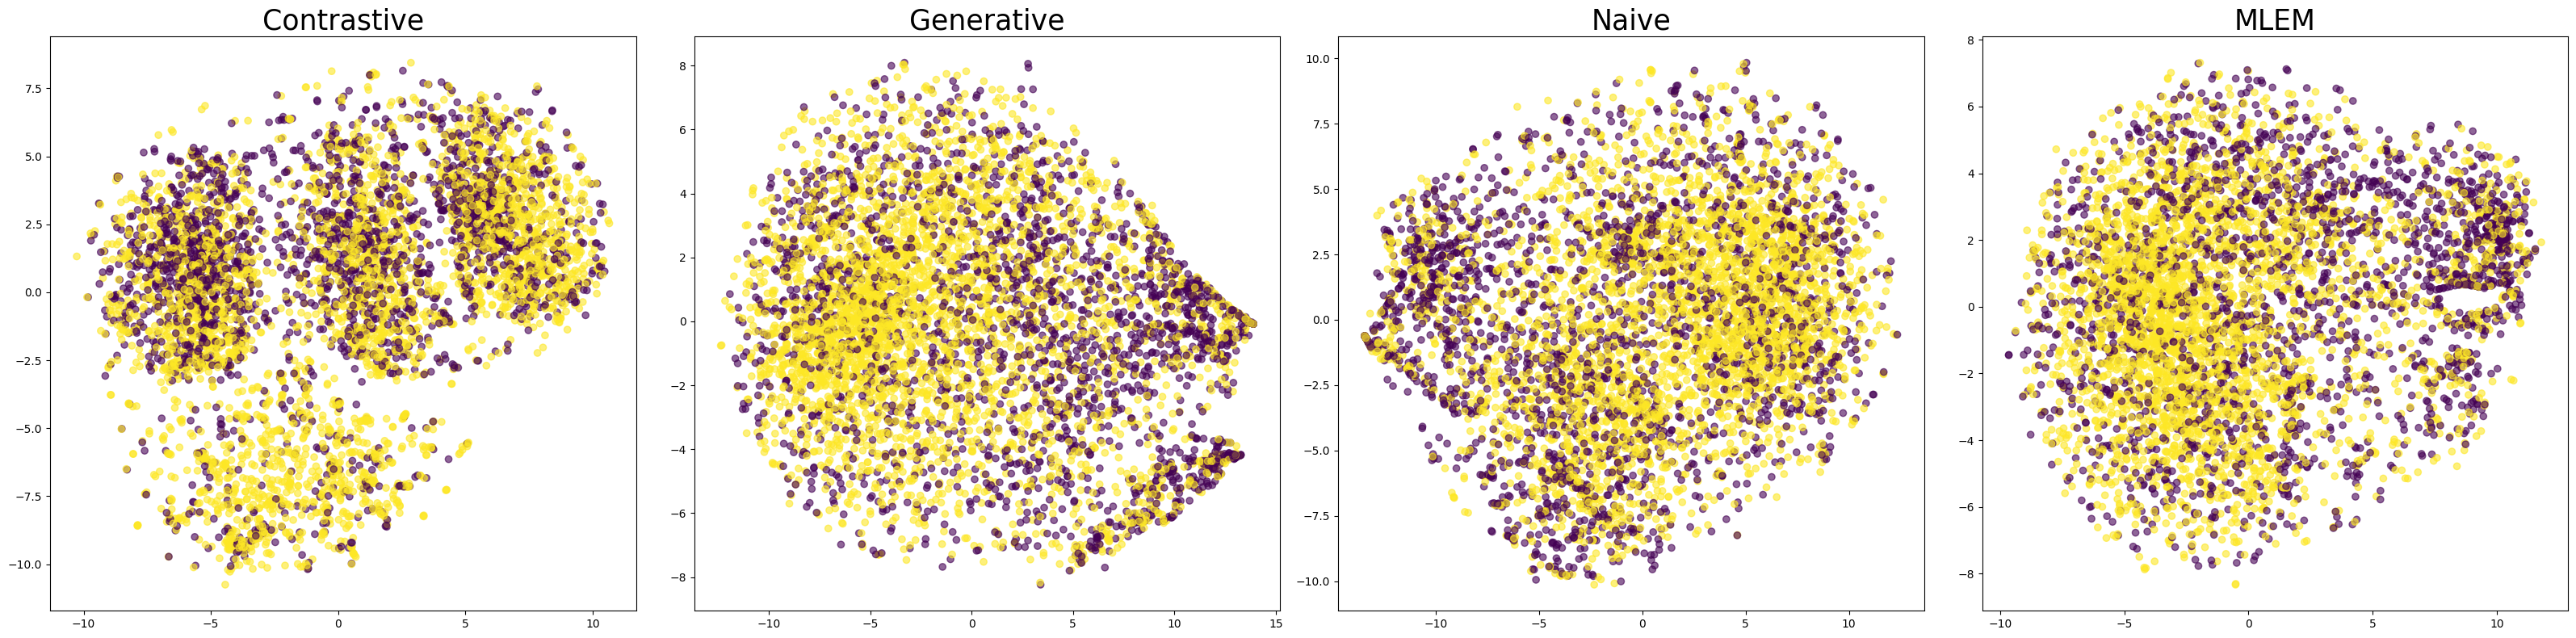

In [20]:

# Create a figure with subplots
fig, axes = plt.subplots(1, len(paths), figsize=(8 * len(paths), 8))

# Plot t-SNE for each set of embeddings
for i, (sub_emb_tsne, all_gt) in enumerate(tsne_results):
    plot_tsne(sub_emb_tsne, all_gt, axes[i], f'{set_names[i]}')

plt.tight_layout()
plt.savefig('tsne_taobao_300ppl.png')
plt.show()


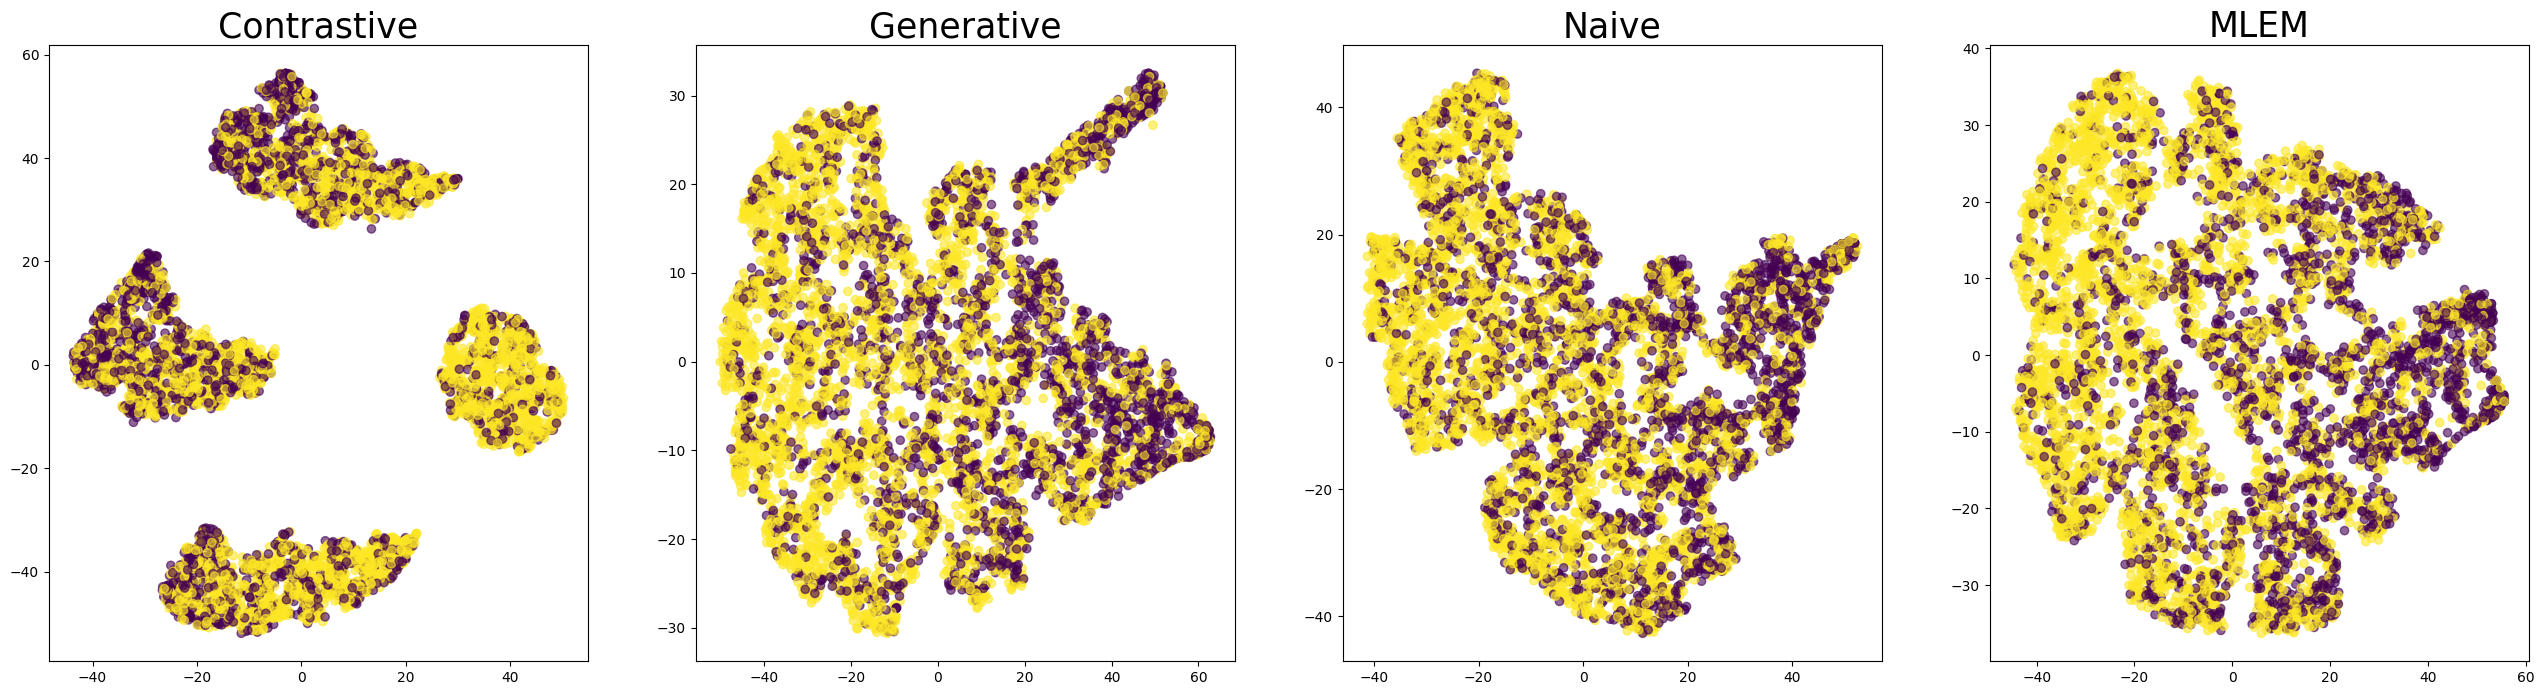

In [32]:
def load_data_and_compute_pca(path_emb, path_gt):
    with open(path_emb, 'rb') as f:
        emb = pickle.load(f)

    with open(path_gt, 'rb') as f:
        gt = pickle.load(f)

    all_gt = [labels[1] for labels in gt]
    all_gt = torch.cat(all_gt)
    all_emb = torch.cat(emb)

    all_emb = all_emb.cpu().numpy()
    all_gt = all_gt.cpu().numpy()

    # Compute PCA on the embeddings
    pca = PCA(n_components=2)
    sub_emb_pca = pca.fit_transform(all_emb)

    # Compute t-SNE on the subset
    tsne = TSNE(n_components=2, random_state=3, perplexity=100)
    sub_emb_tsne = tsne.fit_transform(sub_emb_pca)

    return sub_emb_tsne, all_gt

def plot_pca(sub_emb_pca, all_gt, ax, title):
    # Plot on the given axis
    scatter = ax.scatter(sub_emb_pca[:, 0], sub_emb_pca[:, 1], c=all_gt, cmap='viridis', alpha=0.6)
    ax.set_title(title, fontsize=25)

# Paths to different embeddings and set names
paths = [
    ('../../taobao/logs/contrastive_emb/seed_0/embeddings.pickle', '../../taobao/logs/contrastive_emb/seed_0/gts.pickle'),
    ('../../taobao/logs/gen_emb/seed_1/embeddings.pickle', '../../taobao/logs/gen_emb/seed_1/gts.pickle'),
    ('../../taobao/logs/gc_emb/seed_1/embeddings.pickle', '../../taobao/logs/gc_emb/seed_1/gts.pickle'),
    ('../../taobao/logs/sigmoid_emb/seed_1/embeddings.pickle', '../../taobao/logs/sigmoid_emb/seed_1/gts.pickle')
]
set_names = ['Contrastive', 'Generative', 'Naive', 'MLEM']

# Calculate PCA for each set of embeddings
pca_results = [load_data_and_compute_pca(path_emb, path_gt) for path_emb, path_gt in paths]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(paths), figsize=(8 * len(paths), 8))

# Plot PCA for each set of embeddings
for i, (sub_emb_pca, all_gt) in enumerate(pca_results):
    plot_pca(sub_emb_pca, all_gt, axes[i], f'{set_names[i]}')

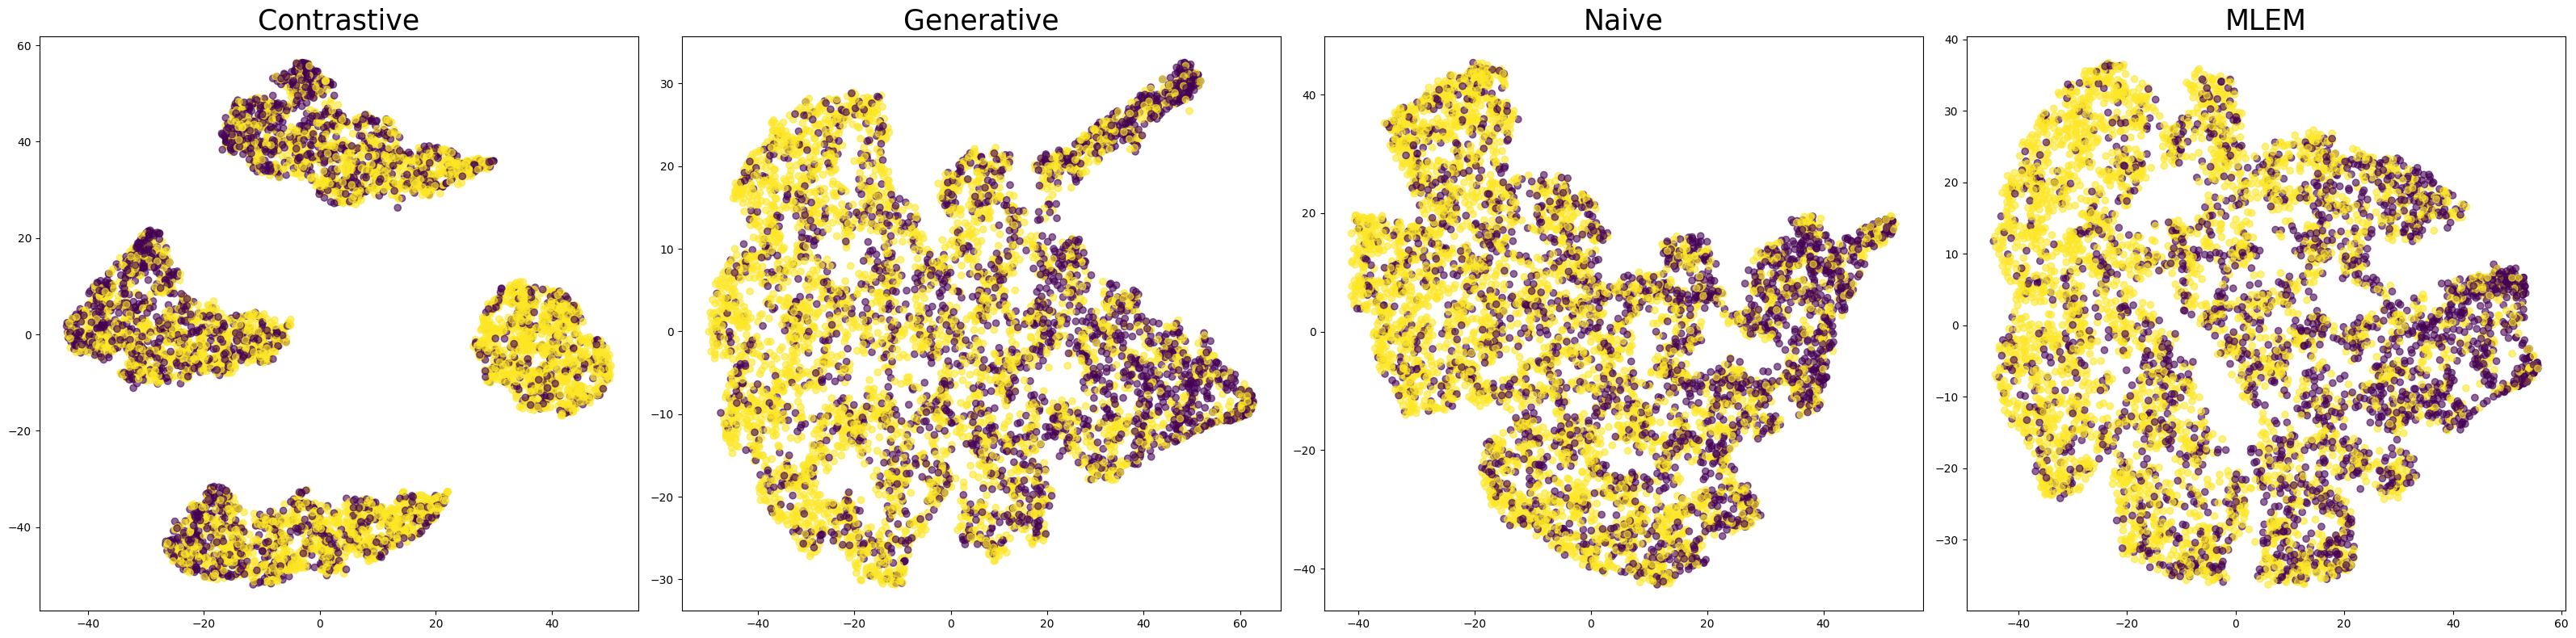

In [33]:

# Create a figure with subplots
fig, axes = plt.subplots(1, len(paths), figsize=(8 * len(paths), 8))

# Plot PCA for each set of embeddings
for i, (sub_emb_pca, all_gt) in enumerate(pca_results):
    plot_pca(sub_emb_pca, all_gt, axes[i], f'{set_names[i]}')

plt.tight_layout()
plt.savefig('tsne_pca2_taobao_100ppl.png')
plt.show()

In [7]:
def load_data_and_compute_tsne(path_emb, path_gt):
    with open(path_emb, 'rb') as f:
        emb = pickle.load(f)

    with open(path_gt, 'rb') as f:
        gt = pickle.load(f)

    all_gt = [labels[1] for labels in gt]
    all_gt = torch.cat(all_gt)
    all_emb = torch.cat(emb)

    all_emb = all_emb.cpu().numpy()
    all_gt = all_gt.cpu().numpy()

    # Compute t-SNE on the subset
    tsne = TSNE(n_components=2, random_state=3)
    sub_emb_tsne = tsne.fit_transform(all_emb)

    return sub_emb_tsne, all_gt

def plot_tsne(sub_emb_tsne, all_gt, ax, title):
    # Plot on the given axis
    scatter = ax.scatter(sub_emb_tsne[:, 0], sub_emb_tsne[:, 1], c=all_gt, cmap='viridis', alpha=0.6)
    ax.set_title(title, fontsize=25)

# Paths to different embeddings and set names
paths = [
    ('../../rosbank/logs/contrastive_emb/seed_0/embeddings.pickle', '../../rosbank/logs/contrastive_emb/seed_0/gts.pickle'),
    ('../../rosbank/logs/gen_emb/seed_1/embeddings.pickle', '../../rosbank/logs/gen_emb/seed_1/gts.pickle'),
    ('../../rosbank/logs/gc_emb/seed_1/embeddings.pickle', '../../rosbank/logs/gc_emb/seed_1/gts.pickle'),
    ('../../rosbank/logs/sigmoid_emb/seed_1/embeddings.pickle', '../../rosbank/logs/sigmoid_emb/seed_1/gts.pickle')
]

set_names = ['Contrastive', 'Generative', 'Naive', 'MLEM']

# Calculate t-SNE for each set of embeddings
tsne_results = [load_data_and_compute_tsne(path_emb, path_gt) for path_emb, path_gt in paths]


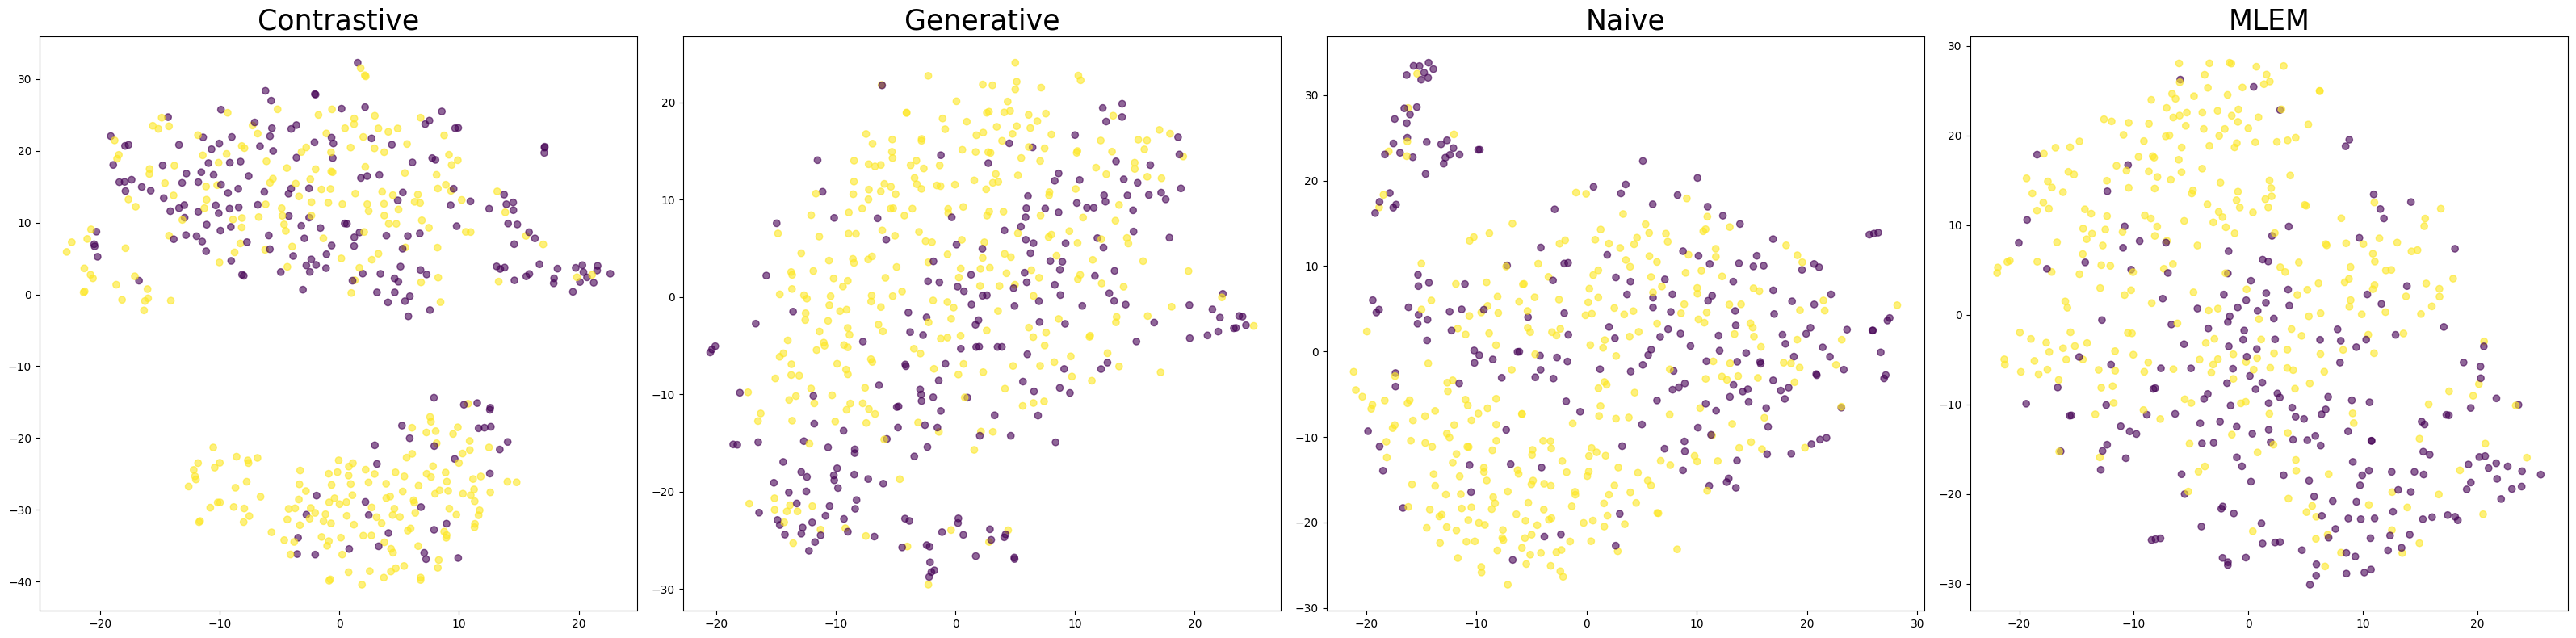

In [8]:

# Create a figure with subplots
fig, axes = plt.subplots(1, len(paths), figsize=(8 * len(paths), 8))

# Plot t-SNE for each set of embeddings
for i, (sub_emb_tsne, all_gt) in enumerate(tsne_results):
    plot_tsne(sub_emb_tsne, all_gt, axes[i], f'{set_names[i]}')

plt.tight_layout()
plt.savefig('tsne_rosbank.png')
plt.show()


In [5]:
path_emb = '../../age/logs/sigmoid_gen/seed_1/embeddings.pickle'
path_gt = '../../age/logs/sigmoid_gen/seed_1/gts.pickle'

with open(path_emb, 'rb') as f:
    emb = pickle.load(f)

with open(path_gt, 'rb') as f:
    gt = pickle.load(f)

all_gt = []
for labels in gt:
    all_gt.append(labels[1])

all_gt = torch.cat(all_gt)

all_emb = torch.cat(emb)

all_emb = all_emb.cpu().numpy()
all_gt = all_gt.cpu().numpy()

In [41]:
# Compute t-SNE on the subset
tsne = TSNE(n_components=2, random_state=3)
sub_emb_tsne = tsne.fit_transform(all_emb)

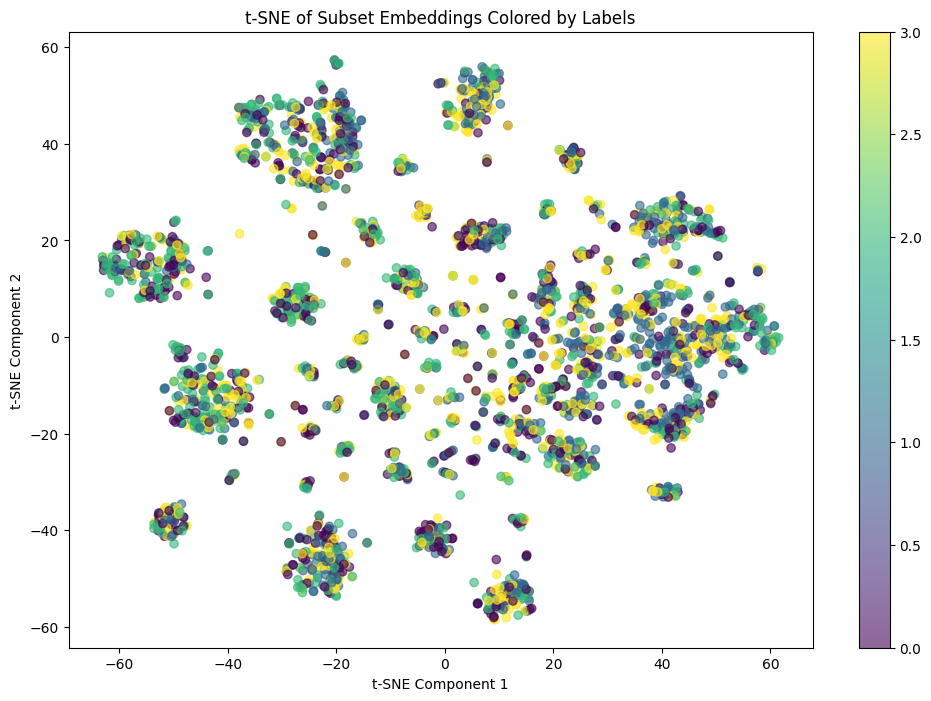

In [38]:
# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(sub_emb_tsne[:, 0], sub_emb_tsne[:, 1], c=all_gt, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE of Subset Embeddings Colored by Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

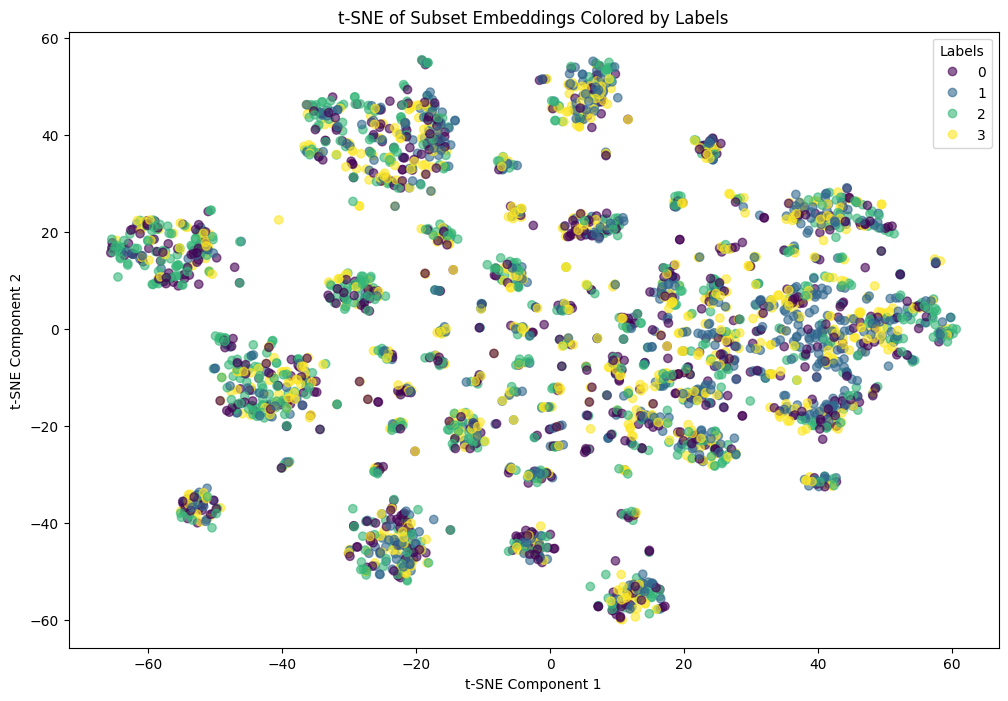

In [42]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(sub_emb_tsne[:, 0], sub_emb_tsne[:, 1], c=all_gt, cmap='viridis', alpha=0.6)

# Create a legend
plt.legend(handles=scatter.legend_elements()[0], title="Labels", labels=[0,1,2,3])
plt.title('t-SNE of Subset Embeddings Colored by Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [6]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
sub_emb_umap = umap_model.fit_transform(all_emb)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


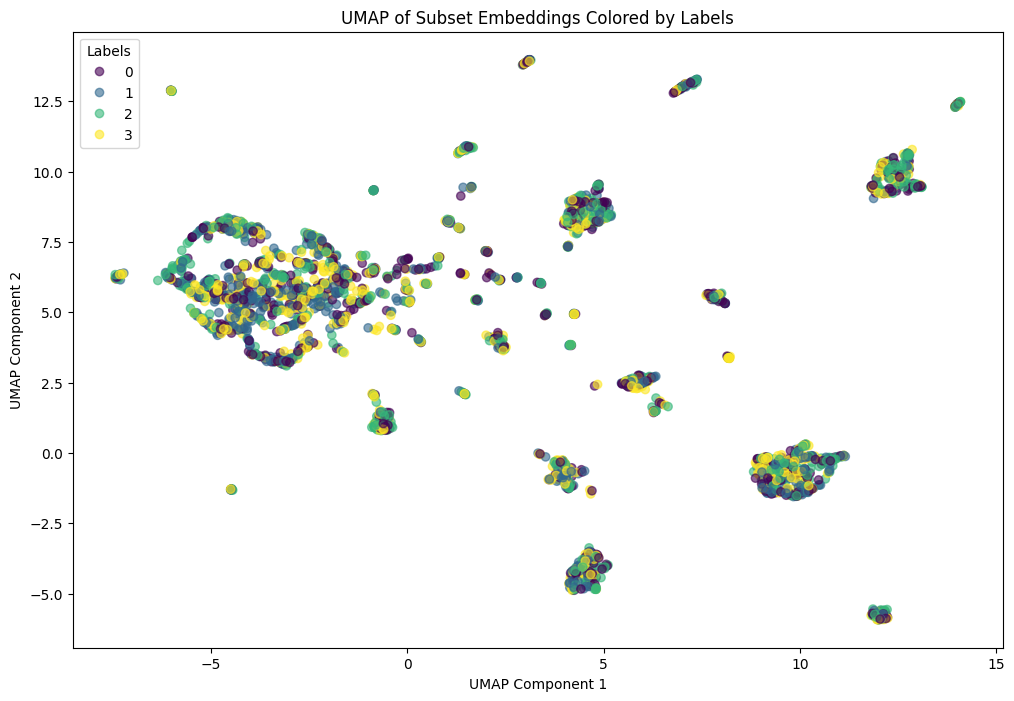

In [7]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(sub_emb_umap[:, 0], sub_emb_umap[:, 1], c=all_gt, cmap='viridis', alpha=0.6)

# Create a legend
plt.legend(handles=scatter.legend_elements()[0], title="Labels", labels=[0,1,2,3])
plt.title('UMAP of Subset Embeddings Colored by Labels')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [2]:
path_emb = '../../age/logs/contrastive_emb/seed_0/embeddings.pickle'
path_gt = '../../age/logs/contrastive_emb/seed_0/gts.pickle'

with open(path_emb, 'rb') as f:
    emb = pickle.load(f)

with open(path_gt, 'rb') as f:
    gt = pickle.load(f)

all_gt = []
for labels in gt:
    all_gt.append(labels[1])

all_gt = torch.cat(all_gt)

all_emb = torch.cat(emb)

all_emb = all_emb.cpu().numpy()
all_gt = all_gt.cpu().numpy()

In [50]:
# Compute t-SNE on the subset
tsne = TSNE(n_components=2, random_state=3)
sub_emb_tsne = tsne.fit_transform(all_emb)

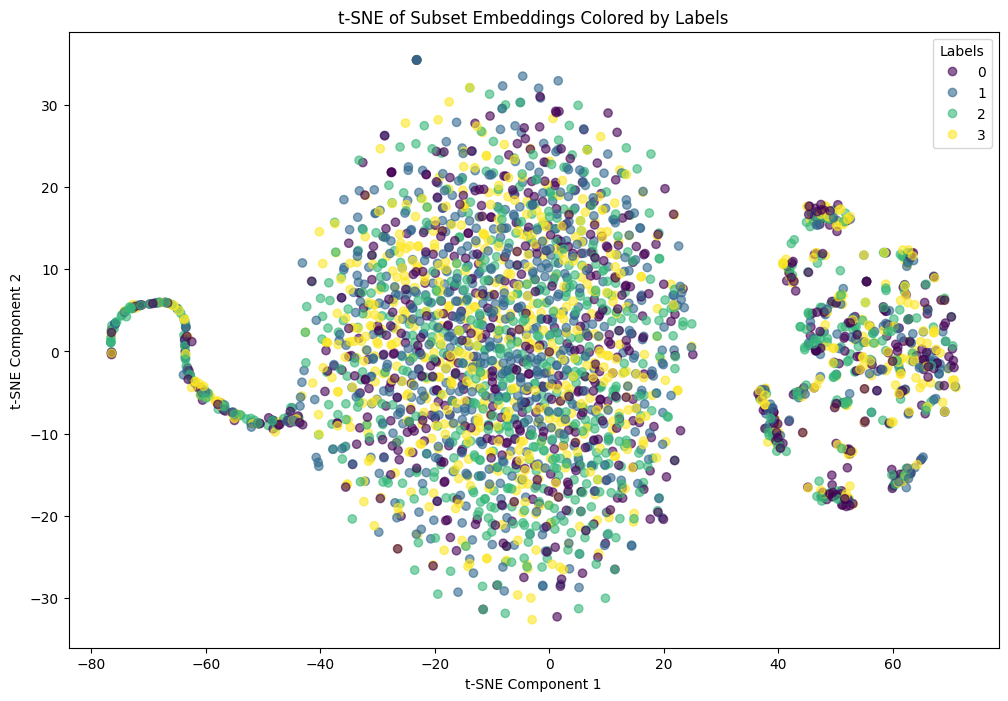

In [51]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(sub_emb_tsne[:, 0], sub_emb_tsne[:, 1], c=all_gt, cmap='viridis', alpha=0.6)

# Create a legend
plt.legend(handles=scatter.legend_elements()[0], title="Labels", labels=[0,1,2,3])
plt.title('t-SNE of Subset Embeddings Colored by Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [3]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
sub_emb_umap = umap_model.fit_transform(all_emb)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


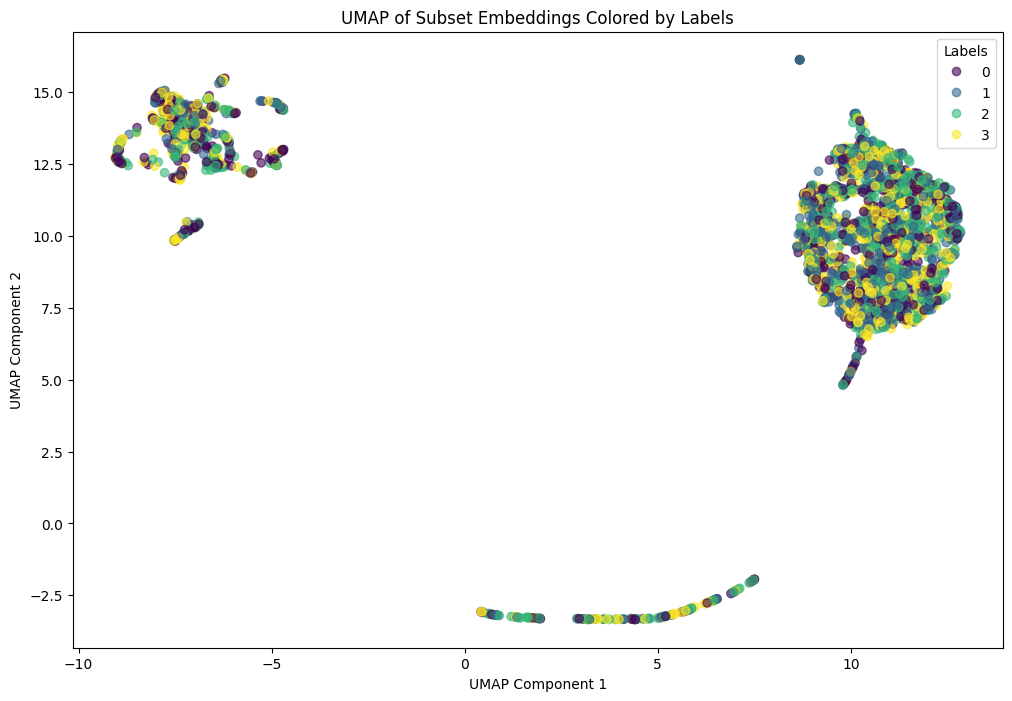

In [4]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(sub_emb_umap[:, 0], sub_emb_umap[:, 1], c=all_gt, cmap='viridis', alpha=0.6)

# Create a legend
plt.legend(handles=scatter.legend_elements()[0], title="Labels", labels=[0,1,2,3])
plt.title('UMAP of Subset Embeddings Colored by Labels')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()